In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import importlib
import utils
import SA_optimize
import random_optimize
from main_cd import main_cd as main
importlib.reload(utils)
importlib.reload(SA_optimize)
importlib.reload(random_optimize)
from utils import *


In [4]:
vars = {
        'M': [1, 10],
        'qbits_per_channel': [3,50],
        'q_swap': [0., 1.],
        } 

vals = {
        'A': main.adjacency_tree(2,3),
        'protocol':'srs', 
        'p_cons': 0.1, 
        'p_gen': 0.9, 
        'p_swap':1,  
        'return_data':'avg', 
        'progress_bar': None,
        'cutoff': 2,
        'total_time': 10,
        'N_samples' : 10,
        }

s = Surrogate(main.simulation_cd,vals,vars,20)

MAXITER = 100
for iter in range(MAXITER):
    x_new, _ , opt = s.improvement()
    s.update(x_new, opt)
    print(iter/MAXITER)
    if iter > 10 and np.mean(list(map(abs,s.mean_improvement[-10:]))) < 1e-3:
        break

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [5]:
s_ref = Surrogate(main.simulation_cd,vals,vars,120)

Text(0.5, 0, 'Iteration')

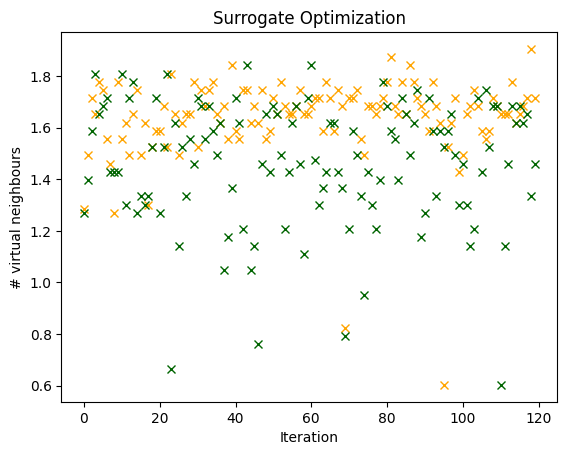

In [13]:
plt.title('Surrogate Optimization')
plt.plot([np.mean(y_i) for y_i in s.y], 'x', label='Surrogate optimization', color='orange')
plt.plot([np.mean(y_i) for y_i in s_ref.y],'x', label='Random evaluations', color='darkgreen')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')

Text(0.5, 23.52222222222222, 'Iteration [1]')

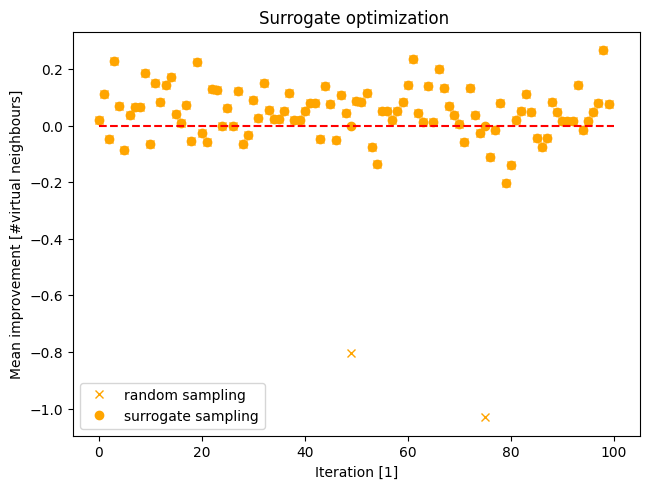

In [7]:
plt.title('Surrogate optimization ')
plt.plot(s.mean_improvement, 'x', label='random sampling', color='orange')
plt.plot(np.array(s.mean_improvement).T*np.array(s.opt_vec), 'o', label='surrogate sampling',color='orange')
plt.hlines(0,0,100,colors='red',linestyles='dashed')
plt.legend()
plt.tight_layout()
plt.ylabel('Mean improvement [#virtual neighbours]')
plt.xlabel('Iteration [1]')

CLUSTER RESULTS - 28.09.2023

In [229]:
import pickle

with open('../surdata/tree23_iter-12_objective-meanopt10-02-2023_17:52.pkl', 'rb') as file:
    # Load the object from the file
    loaded_data = pickle.load(file)

In [230]:
model, refmodel = loaded_data

In [236]:
model.X_df.astype(pd.SparseDtype("int", 0)).sparse.density

1.0

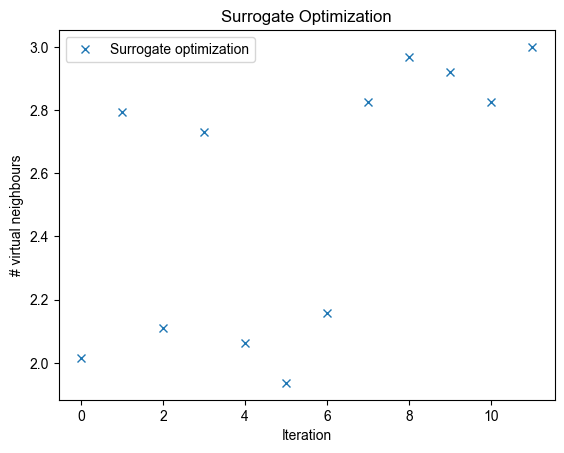

In [232]:
#fig = plt.figure(figsize=(20,10))
plt.title('Surrogate Optimization')
plt.plot([np.mean(y_i) for y_i in np.array(model.y)[np.where(model.flag_vec)]], 'x', label='Surrogate optimization')
#plt.plot([np.mean(np.array(y_i)) for y_i in refmodel.y],'x', label='Random evaluations')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')
plt.legend()

Text(0.5, 0, 'Iteration [1]')

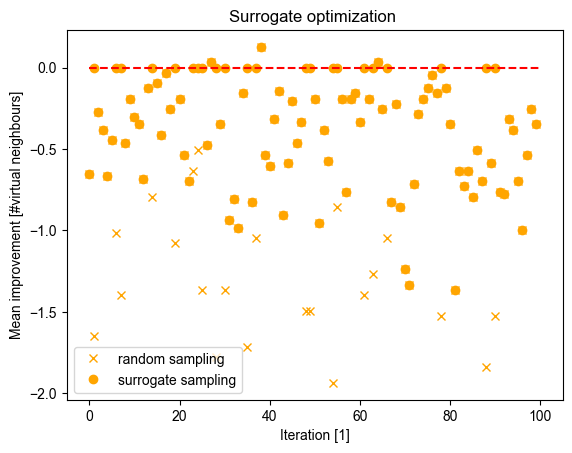

In [135]:
plt.title('Surrogate optimization ')
plt.plot(model.mean_improvement[:100], 'x', label='random sampling', color='orange')
plt.plot(np.array(model.mean_improvement[:100]).T*np.array(model.opt_vec[:100]), 'o', label='surrogate sampling',color='orange')
plt.hlines(0,0,100,colors='red',linestyles='dashed')
plt.legend()
plt.ylabel('Mean improvement [#virtual neighbours]')
plt.xlabel('Iteration [1]')